## Instalação das bibliotecas

In [119]:
!pip install faker

In [120]:
!pip install geopandas

^C


In [ ]:
!pip install unidecode

## Imports

In [ ]:
# Tratamento e manipulação de dados
from faker import Faker
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import geopandas as gpd


import random

## Creat Dataset

In [ ]:
# Connfigurando para o idioma Português - Brasil

fake = Faker('pt_BR')

In [ ]:
# Criando uma nova tabela de clientes

new_clientes = pd.DataFrame(columns = ['Id_Cliente', 'Nome Cliente', 'Estado'])

# Pegando as siglas dos estados brasileiros

for i in range(1, 500):
#    estados = fake.random_element(elements=['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'])
#    cidades = fake.city(state_abbr=estados)


    clientes = {
        'Id_Cliente': i,
        'Nome Cliente': fake.name(),
        'Estado': fake.state()

    }
        

    new_clientes = new_clientes.append(clientes, ignore_index= True)

new_clientes.head()


,Id_Cliente,Nome Cliente,Estado
0,1,Luana da Luz,Piauí
1,2,Luiz Miguel Nascimento,Minas Gerais
2,3,Igor Pires,Roraima
3,4,Igor Martins,Rio de Janeiro
4,5,Caroline Araújo,Mato Grosso do Sul


In [ ]:
# Adicionando os códigos dos estados para criação do Mapa Coropletico

# # Dicionário com os códigos IBGE dos estados brasileiros
codigos_ibge = {
    'Acre': 12,
    'Alagoas': 27,
    'Amapá': 16,
    'Amazonas': 13,
    'Bahia': 29,
    'Ceará': 23,
    'Distrito Federal': 53,
    'Espírito Santo': 32,
    'Goiás': 52,
    'Maranhão': 21,
    'Mato Grosso': 51,
    'Mato Grosso do Sul': 50,
    'Minas Gerais': 31,
    'Pará': 15,
    'Paraíba': 25,
    'Paraná': 41,
    'Pernambuco': 26,
    'Piauí': 22,
    'Rio de Janeiro': 33,
    'Rio Grande do Norte': 24,
    'Rio Grande do Sul': 43,
    'Rondônia': 11,
    'Roraima': 14,
    'Santa Catarina': 42,
    'São Paulo': 35,
    'Sergipe': 28,
    'Tocantins': 17
}

new_clientes['Codigo_IBGE'] = new_clientes['Estado'].map(codigos_ibge)

new_clientes.head()


,Id_Cliente,Nome Cliente,Estado,Codigo_IBGE
0,1,Luana da Luz,Piauí,22
1,2,Luiz Miguel Nascimento,Minas Gerais,31
2,3,Igor Pires,Roraima,14
3,4,Igor Martins,Rio de Janeiro,33
4,5,Caroline Araújo,Mato Grosso do Sul,50


In [ ]:
# Criando a tabela de transportadores

transportadores = pd.DataFrame(columns= ['Id_Transportador', 'Nome Transportador'])

for i in range(1, 16):
    empresas = {
        'Id_Transportador': i,
        'Nome Transportador': fake.company()
    }

    transportadores = transportadores.append(empresas, ignore_index = True)

transportadores

,Id_Transportador,Nome Transportador
0,1,Costela Silva S.A.
1,2,Nascimento
2,3,Azevedo Pinto S/A
3,4,Sales
4,5,Costa
5,6,Freitas e Filhos
6,7,Teixeira
7,8,Gonçalves Ltda.
8,9,Castro S.A.
9,10,Rocha Ribeiro e Filhos


In [ ]:
# Criar a tabela de notas fiscais
notas_fiscais = pd.DataFrame(columns=['Id_Cliente', 'Id_Transportador', 'Nota Fiscal',
                                      'Qtd Volumes', 'Valor Nota Fiscal', 'Prazo Contratado',
                                      'Data Expedição', 'Data Entrega', 'Ocorrência de Entrega'])

# Gerar os dados
for i in range(1, 2501):
    data_expedicao = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 364))
    prazo_entrega = random.randint(1, 30)
    data_entrega = data_expedicao + timedelta(days=prazo_entrega)

    # Garantir que a data de entrega seja no ano de 2023
    if data_entrega.year != 2023:
        data_entrega = datetime(2023, 12, 31)

    nf = {
        'Id_Cliente': random.randint(1, 500),
        'Id_Transportador': random.randint(1, 16),
        'Nota Fiscal': i,
        'Qtd Volumes': random.randint(1, 51),
        'Valor Nota Fiscal': round(random.uniform(10, 5025), 2),
        'Prazo Contratado': random.randint(1, 41),
        'Data Expedição': data_expedicao.strftime('%Y-%m-%d'),
        'Data Entrega': data_entrega.strftime('%Y-%m-%d'),
        'Ocorrência de Entrega': fake.random_element(elements=['Sem Ocorrência', 'Entrega com Avaria'])
    }

    # Adicionar o dicionário à lista de dados
    notas_fiscais = notas_fiscais.append(nf, ignore_index=True)

notas_fiscais.head()

,Id_Cliente,Id_Transportador,Nota Fiscal,Qtd Volumes,Valor Nota Fiscal,Prazo Contratado,Data Expedição,Data Entrega,Ocorrência de Entrega
0,259,15,1,17,2545.32,27,2023-11-19,2023-12-17,Entrega com Avaria
1,45,5,2,8,2203.89,1,2023-06-09,2023-07-02,Sem Ocorrência
2,321,2,3,28,752.51,27,2023-06-02,2023-06-03,Sem Ocorrência
3,52,12,4,1,1163.88,8,2023-01-10,2023-02-08,Entrega com Avaria
4,208,1,5,5,3381.40,40,2023-01-15,2023-01-17,Sem Ocorrência


## Save Datasets

In [ ]:
# Tabela clientes

new_clientes.to_csv('clientes.csv', index= False)

transportadores.to_csv('transportadores.csv', index= False)

notas_fiscais.to_csv('notas-fiscais.csv', index= False)

## Load Data

In [ ]:
# Tabela cliente
new_clientes = pd.read_csv('clientes.csv')

# Tabela transportadores
transportadores = pd.read_csv('transportadores.csv')

#Tabela Nota Fiscal
notas_fiscais = pd.read_csv('notas-fiscais.csv')



## Modelagem

In [ ]:
# Unir a tabela de clientes com a tabela de notas fiscais
otif = pd.merge(new_clientes, notas_fiscais, left_on='Id_Cliente', right_on='Id_Cliente', how='inner')

# Unir a tabela resultante com a tabela de transportadores
otif = pd.merge(otif, transportadores, left_on='Id_Transportador', right_on='Id_Transportador', how='inner')

# Reorganizar as colunas na ordem desejada
otif = otif[['Id_Cliente', 'Nome Cliente', 'Estado', 'Codigo_IBGE', 'Id_Transportador', 'Nome Transportador', 'Nota Fiscal', 'Qtd Volumes', 'Valor Nota Fiscal', 'Prazo Contratado', 'Data Expedição', 'Data Entrega', 'Ocorrência de Entrega']]

otif.head()

,Id_Cliente,Nome Cliente,Estado,Codigo_IBGE,Id_Transportador,Nome Transportador,Nota Fiscal,Qtd Volumes,Valor Nota Fiscal,Prazo Contratado,Data Expedição,Data Entrega,Ocorrência de Entrega
0,1,Luana da Luz,Piauí,22,5,Costa,22,7,3656.67,37,2023-11-16,2023-12-02,Sem Ocorrência
1,1,Luana da Luz,Piauí,22,5,Costa,466,15,369.67,34,2023-07-19,2023-08-18,Entrega com Avaria
2,16,Davi Lucas Rodrigues,Distrito Federal,53,5,Costa,1522,40,5023.83,6,2023-01-23,2023-01-29,Sem Ocorrência
3,16,Davi Lucas Rodrigues,Distrito Federal,53,5,Costa,1724,46,3734.08,2,2023-11-23,2023-12-23,Entrega com Avaria
4,19,Diego da Cunha,Maranhão,21,5,Costa,273,51,1833.73,7,2023-03-04,2023-03-28,Sem Ocorrência


In [ ]:
# Verificando os tipos de dados das colunas
otif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2349
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id_Cliente             2350 non-null   int64  
 1   Nome Cliente           2350 non-null   object 
 2   Estado                 2350 non-null   object 
 3   Codigo_IBGE            2350 non-null   int64  
 4   Id_Transportador       2350 non-null   int64  
 5   Nome Transportador     2350 non-null   object 
 6   Nota Fiscal            2350 non-null   int64  
 7   Qtd Volumes            2350 non-null   int64  
 8   Valor Nota Fiscal      2350 non-null   float64
 9   Prazo Contratado       2350 non-null   int64  
 10  Data Expedição         2350 non-null   object 
 11  Data Entrega           2350 non-null   object 
 12  Ocorrência de Entrega  2350 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 257.0+ KB


In [ ]:
# Convertendo os tipos de dados de algumas colunas

# Colunas de data:

otif['Data Expedição'] = pd.to_datetime(otif['Data Expedição'])
otif['Data Entrega'] = pd.to_datetime(otif['Data Entrega'])

# Convertendo as colunas númericas

#otif['Valor Nota Fiscal'] = otif['Valor Nota Fiscal'].astype(float)
otif['Qtd Volumes'] = otif['Qtd Volumes'].astype(int)
otif['Prazo Contratado'] =  otif['Prazo Contratado'].astype(int)

# Verificando os tipos de dados

otif.dtypes




Id_Cliente                        int64
Nome Cliente                     object
Estado                           object
Codigo_IBGE                       int64
Id_Transportador                  int64
Nome Transportador               object
Nota Fiscal                       int64
Qtd Volumes                       int32
Valor Nota Fiscal               float64
Prazo Contratado                  int32
Data Expedição           datetime64[ns]
Data Entrega             datetime64[ns]
Ocorrência de Entrega            object
dtype: object

In [ ]:
# Criando uma coluna de Dias Entrega

otif['Prazo Entrega'] = (otif['Data Entrega'] - otif['Data Expedição']).dt.days

otif.head()

,Id_Cliente,Nome Cliente,Estado,Codigo_IBGE,Id_Transportador,Nome Transportador,Nota Fiscal,Qtd Volumes,Valor Nota Fiscal,Prazo Contratado,Data Expedição,Data Entrega,Ocorrência de Entrega,Prazo Entrega
0,1,Luana da Luz,Piauí,22,5,Costa,22,7,3656.67,37,2023-11-16,2023-12-02,Sem Ocorrência,16
1,1,Luana da Luz,Piauí,22,5,Costa,466,15,369.67,34,2023-07-19,2023-08-18,Entrega com Avaria,30
2,16,Davi Lucas Rodrigues,Distrito Federal,53,5,Costa,1522,40,5023.83,6,2023-01-23,2023-01-29,Sem Ocorrência,6
3,16,Davi Lucas Rodrigues,Distrito Federal,53,5,Costa,1724,46,3734.08,2,2023-11-23,2023-12-23,Entrega com Avaria,30
4,19,Diego da Cunha,Maranhão,21,5,Costa,273,51,1833.73,7,2023-03-04,2023-03-28,Sem Ocorrência,24


In [ ]:
# Adicionar coluna 'On Time'
otif['On Time'] = otif.apply(lambda row: 'Late Time' if row['Prazo Entrega'] > row['Prazo Contratado'] else 'On Time', axis=1)


otif.head()

,Id_Cliente,Nome Cliente,Estado,Codigo_IBGE,Id_Transportador,Nome Transportador,Nota Fiscal,Qtd Volumes,Valor Nota Fiscal,Prazo Contratado,Data Expedição,Data Entrega,Ocorrência de Entrega,Prazo Entrega,On Time
0,1,Luana da Luz,Piauí,22,5,Costa,22,7,3656.67,37,2023-11-16,2023-12-02,Sem Ocorrência,16,On Time
1,1,Luana da Luz,Piauí,22,5,Costa,466,15,369.67,34,2023-07-19,2023-08-18,Entrega com Avaria,30,On Time
2,16,Davi Lucas Rodrigues,Distrito Federal,53,5,Costa,1522,40,5023.83,6,2023-01-23,2023-01-29,Sem Ocorrência,6,On Time
3,16,Davi Lucas Rodrigues,Distrito Federal,53,5,Costa,1724,46,3734.08,2,2023-11-23,2023-12-23,Entrega com Avaria,30,Late Time
4,19,Diego da Cunha,Maranhão,21,5,Costa,273,51,1833.73,7,2023-03-04,2023-03-28,Sem Ocorrência,24,Late Time


In [ ]:
# Adicionar coluna 'In Full'
otif['In Full'] = otif.apply(lambda row: 'In Full' if row['On Time'] == 'On Time' and row['Ocorrência de Entrega'] == 'Sem Ocorrência' else 'Avaria', axis=1)


In [ ]:
# Salvando a tabela OTIF

otif.to_csv('otif.csv', index = False)

## EDA

### Visão geral da base de dados

In [121]:
# carrehando o dataset

otif = pd.read_csv('otif.csv')

In [122]:
# dimensões do dataset

print('Número de linhas: {}'.format(otif.shape[0]))
print('Número de colunas: {}'.format(otif.shape[1]))     

Número de linhas: 2350
Número de colunas: 16


In [123]:
# Nome das collunas
otif.columns

Index(['Id_Cliente', 'Nome Cliente', 'Estado', 'Codigo_IBGE',
       'Id_Transportador', 'Nome Transportador', 'Nota Fiscal', 'Qtd Volumes',
       'Valor Nota Fiscal', 'Prazo Contratado', 'Data Expedição',
       'Data Entrega', 'Ocorrência de Entrega', 'Prazo Entrega', 'On Time',
       'In Full'],
      dtype='object')

In [124]:
# Verificando valores nulos

otif.isnull().sum()

Id_Cliente               0
Nome Cliente             0
Estado                   0
Codigo_IBGE              0
Id_Transportador         0
Nome Transportador       0
Nota Fiscal              0
Qtd Volumes              0
Valor Nota Fiscal        0
Prazo Contratado         0
Data Expedição           0
Data Entrega             0
Ocorrência de Entrega    0
Prazo Entrega            0
On Time                  0
In Full                  0
dtype: int64

In [125]:
# Verificando os tipos de dados

otif.dtypes

Id_Cliente                 int64
Nome Cliente              object
Estado                    object
Codigo_IBGE                int64
Id_Transportador           int64
Nome Transportador        object
Nota Fiscal                int64
Qtd Volumes                int64
Valor Nota Fiscal        float64
Prazo Contratado           int64
Data Expedição            object
Data Entrega              object
Ocorrência de Entrega     object
Prazo Entrega              int64
On Time                   object
In Full                   object
dtype: object

In [126]:
# Convertendo os tipos de dados de algumas colunas

# Colunas de data:

otif['Data Expedição'] = pd.to_datetime(otif['Data Expedição'])
otif['Data Entrega'] = pd.to_datetime(otif['Data Entrega'])

# Convertendo as colunas númericas

#otif['Valor Nota Fiscal'] = otif['Valor Nota Fiscal'].astype(float)
otif['Qtd Volumes'] = otif['Qtd Volumes'].astype(int)
otif['Prazo Contratado'] =  otif['Prazo Contratado'].astype(int)

# Verificando os tipos de dados

otif.dtypes




Id_Cliente                        int64
Nome Cliente                     object
Estado                           object
Codigo_IBGE                       int64
Id_Transportador                  int64
Nome Transportador               object
Nota Fiscal                       int64
Qtd Volumes                       int32
Valor Nota Fiscal               float64
Prazo Contratado                  int32
Data Expedição           datetime64[ns]
Data Entrega             datetime64[ns]
Ocorrência de Entrega            object
Prazo Entrega                     int64
On Time                          object
In Full                          object
dtype: object

In [127]:
# verificando as informações da base
otif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id_Cliente             2350 non-null   int64         
 1   Nome Cliente           2350 non-null   object        
 2   Estado                 2350 non-null   object        
 3   Codigo_IBGE            2350 non-null   int64         
 4   Id_Transportador       2350 non-null   int64         
 5   Nome Transportador     2350 non-null   object        
 6   Nota Fiscal            2350 non-null   int64         
 7   Qtd Volumes            2350 non-null   int32         
 8   Valor Nota Fiscal      2350 non-null   float64       
 9   Prazo Contratado       2350 non-null   int32         
 10  Data Expedição         2350 non-null   datetime64[ns]
 11  Data Entrega           2350 non-null   datetime64[ns]
 12  Ocorrência de Entrega  2350 non-null   object        
 13  Pra

In [129]:
# Resumo estatístico 
otif.describe()

,Id_Cliente,Codigo_IBGE,Id_Transportador,Nota Fiscal,Qtd Volumes,Valor Nota Fiscal,Prazo Contratado,Prazo Entrega
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,252.322979,30.368936,8.041702,1249.166383,25.655319,2470.487838,20.860426,14.829787
std,144.184741,12.948257,4.310921,722.912514,14.883124,1452.762874,11.744336,8.586671
min,1.000000,11.000000,1.000000,1.000000,1.000000,10.340000,1.000000,0.000000
25%,128.000000,21.000000,4.000000,623.250000,13.000000,1197.822500,11.000000,7.000000
50%,256.000000,29.000000,8.000000,1241.500000,25.000000,2486.350000,21.000000,14.000000
75%,376.750000,42.000000,12.000000,1874.750000,39.000000,3730.985000,31.000000,22.000000
max,499.000000,53.000000,15.000000,2500.000000,51.000000,5023.830000,41.000000,30.000000


In [130]:
# Quantidade de pedidos on time e late time

otif_on = len(otif.loc[otif['On Time'] == 'On Time'])
otif_late = len(otif.loc[otif['On Time'] == 'Late Time'])



print('Número de pedidos On Time: {0} ({1:2.2f}%)'.format(otif_on, (otif_on / (otif_on + otif_late)) * 100))

print('Número de pedidos Late Time: {0} ({1:2.2f}%)'.format(otif_late, (otif_late / (otif_on + otif_late)) * 100))

Número de pedidos On Time: 1542 (65.62%)
Número de pedidos Late Time: 808 (34.38%)


In [131]:
# Quantidade de pedidos In full e com Avaria

otif_infull = len(otif.loc[otif['In Full'] == 'In Full'])
otif_avaria = len(otif.loc[otif['In Full'] == "Avaria"])

print('Número de pedidos In Full: {0}({1:2.2f}%)'.format(otif_infull, (otif_infull / (otif_infull + otif_avaria)) * 100))
print('Número de pedidos com Avaria: {0}({1:2.2f}%)'.format(otif_avaria, (otif_avaria / (otif_avaria + otif_infull)) * 100))


Número de pedidos In Full: 722(30.72%)
Número de pedidos com Avaria: 1628(69.28%)


## Visualização dos dados

In [132]:
# Definindo o estilo dos gráfucos

sns.set_style('whitegrid')

warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [133]:
# Variáveis Numéricas
num_cols = ['Qtd Volumes', 'Valor Nota Fiscal', 'Prazo Contratado', 'Prazo Entrega']

# Variáveis Categóricas
cat_cols = ['Ocorrência de Entrega', 'On Time', 'In Full']

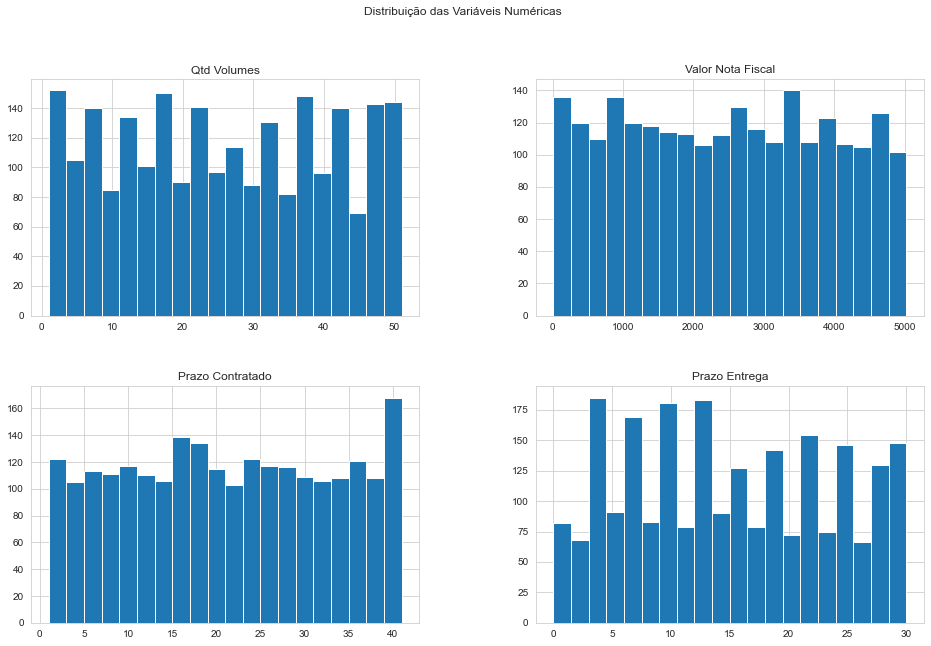

In [134]:
# Histograma das variaveis numéricas
otif[num_cols].hist(bins=20, figsize=(16, 10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

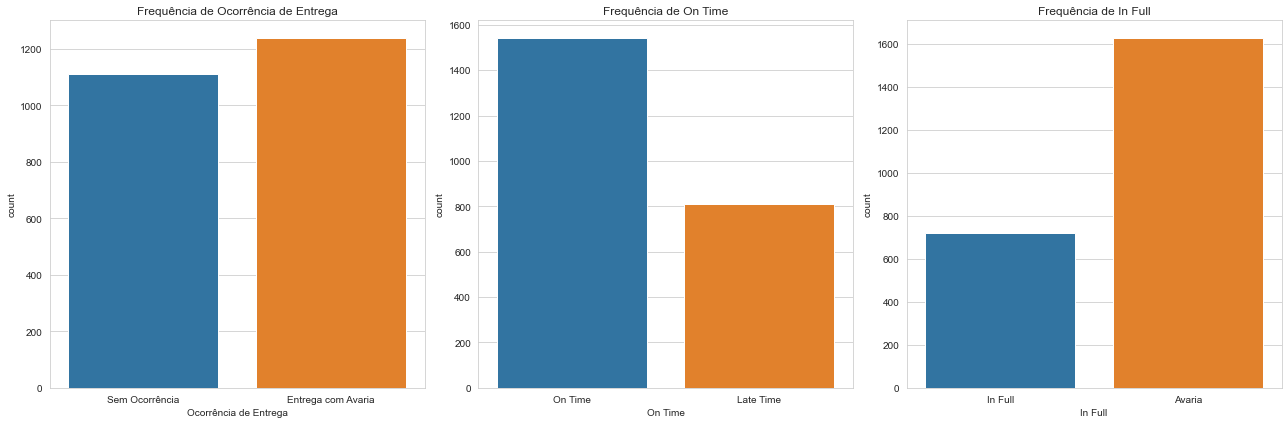

In [135]:
# PLots com as variaves categoricas 

fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 6))
for ax, col in zip(axes, cat_cols):
    sns.countplot(x=col, data=otif, ax=ax)
    ax.set_title(f'Frequência de {col}')
plt.tight_layout()
plt.show()

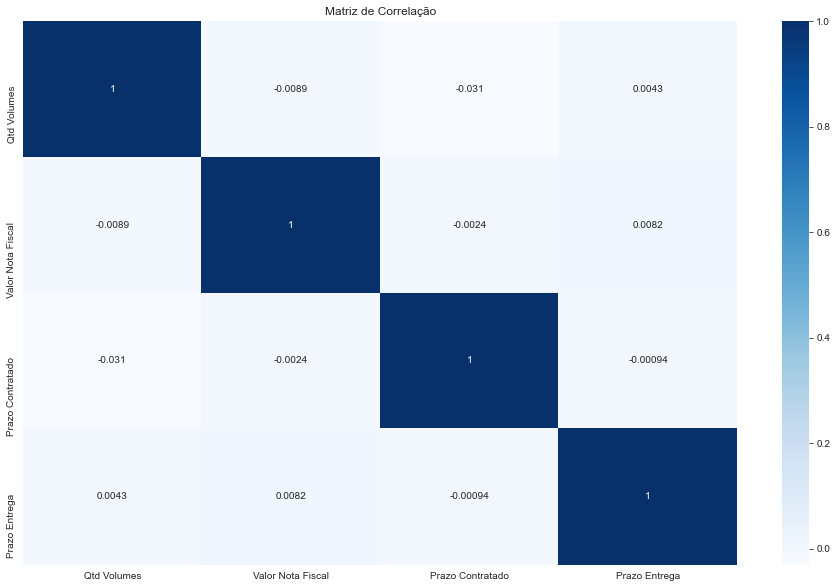

In [136]:
# Gráfico de correlação  - Matriz de correlação

corr_matrix = otif[num_cols].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

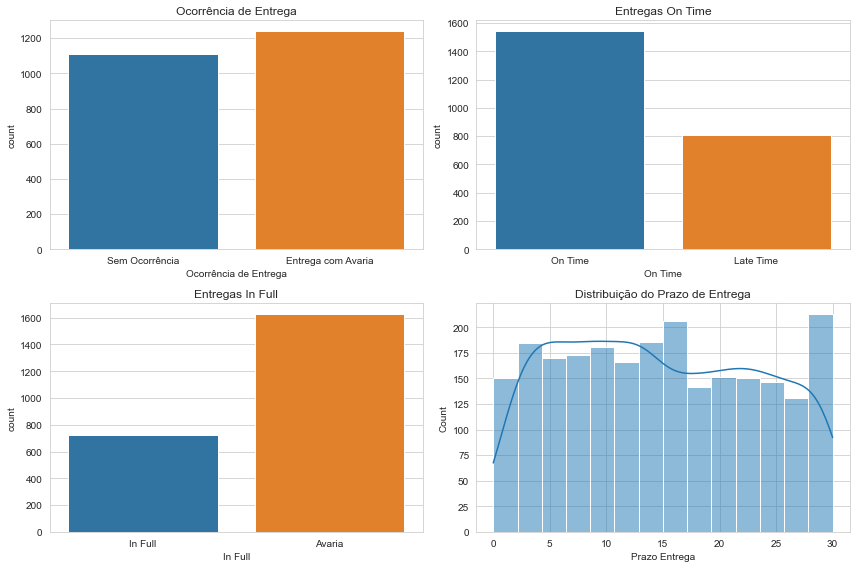

In [137]:
# Análise de Ocorrências de Entrega e Prazo de Entrega
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Ocorrência de Entrega
sns.countplot(x='Ocorrência de Entrega', data=otif, ax=axes[0, 0])
axes[0, 0].set_title('Ocorrência de Entrega')

# Entregas On Time
sns.countplot(x='On Time', data=otif, ax=axes[0, 1])
axes[0, 1].set_title('Entregas On Time')

# Entregas In Full
sns.countplot(x='In Full', data=otif, ax=axes[1, 0])
axes[1, 0].set_title('Entregas In Full')

# Distribuição do Prazo de Entrega
otif['Prazo Entrega'] = (pd.to_datetime(otif['Data Entrega']) - pd.to_datetime(otif['Data Expedição'])).dt.days
sns.histplot(otif['Prazo Entrega'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição do Prazo de Entrega')

plt.tight_layout()
plt.show()

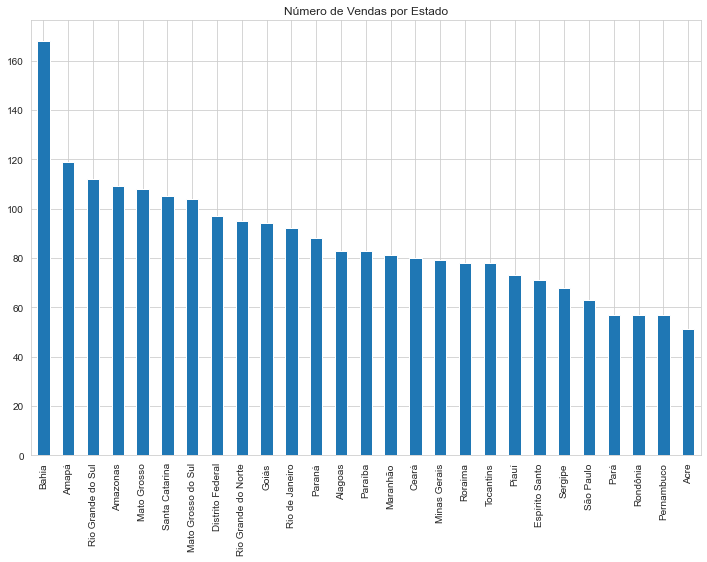

In [139]:
# Análise por Estado
otif['Estado'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Número de Vendas por Estado')
plt.show()


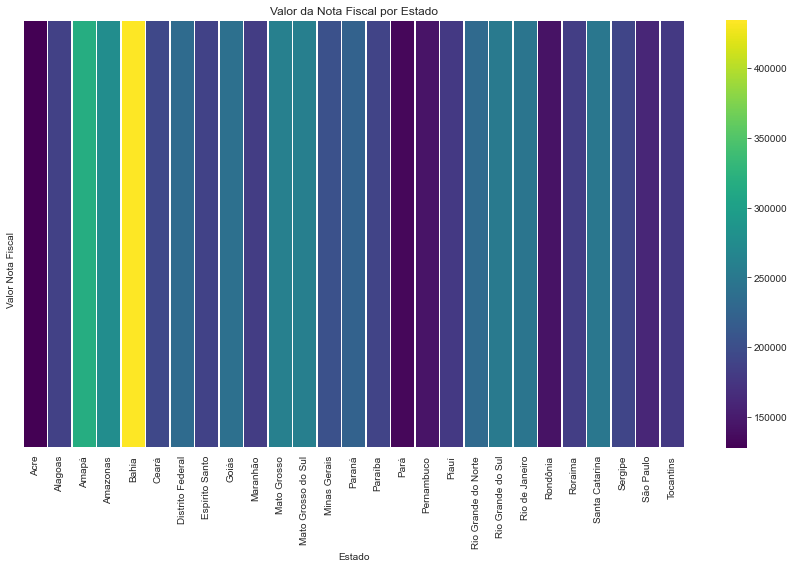

In [144]:
# Criar o gráfico de calor: Valor de nota fiscal por estado
plt.figure(figsize=(12, 8))
heatmap_data = otif.pivot_table(values='Valor Nota Fiscal', index='Estado', aggfunc='sum')
sns.heatmap(heatmap_data.T, cmap='viridis', annot=False, fmt=".1f", linewidths=.5)
plt.title('Valor da Nota Fiscal por Estado')
plt.xlabel('Estado')
#plt.ylabel('Valor Total da Nota Fiscal')
plt.tight_layout()
plt.show()

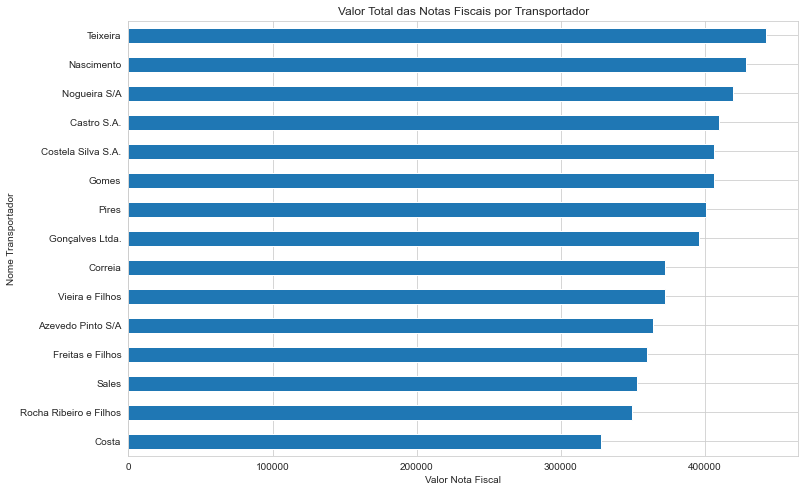

In [140]:
# Valor Total das Notas Fiscais por Transportador
transportador_valor = otif.groupby('Nome Transportador')['Valor Nota Fiscal'].sum().sort_values()
transportador_valor.plot(kind='barh', figsize=(12, 8))
plt.title('Valor Total das Notas Fiscais por Transportador')
plt.xlabel('Valor Nota Fiscal')
plt.show()

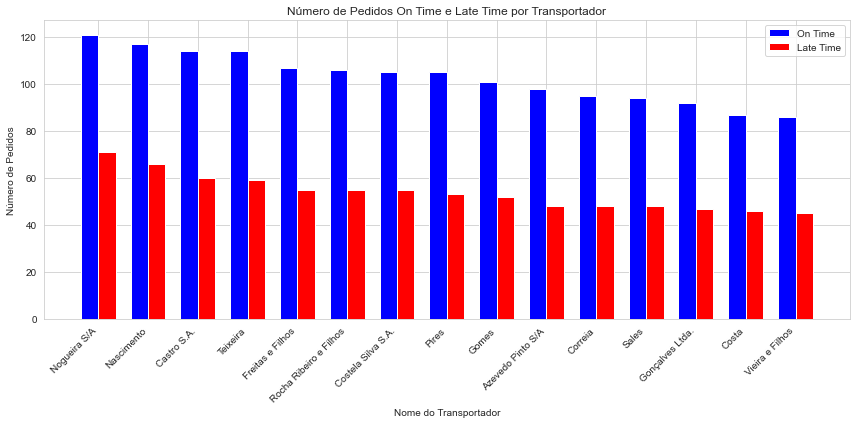

In [141]:
# Contar o número de pedidos "On Time" e "Late Time" por transportador
on_time_counts = otif[otif['On Time'] == 'On Time'].groupby('Nome Transportador').size().sort_values(ascending=False)
late_time_counts = otif[otif['On Time'] == 'Late Time'].groupby('Nome Transportador').size().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))

# Largura das barras
bar_width = 0.35

# Índices para os transportadores
index = range(len(on_time_counts))

# Barras para pedidos On Time (azul)
plt.bar(index, on_time_counts.values, bar_width, color='blue', label='On Time')

# Barras para pedidos Late Time (vermelho)
plt.bar([i + bar_width for i in index], late_time_counts.values, bar_width, color='red', label='Late Time')

plt.title('Número de Pedidos On Time e Late Time por Transportador')
plt.xlabel('Nome do Transportador')
plt.ylabel('Número de Pedidos')
plt.xticks([i + bar_width / 2 for i in index], on_time_counts.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1008x576 with 0 Axes>

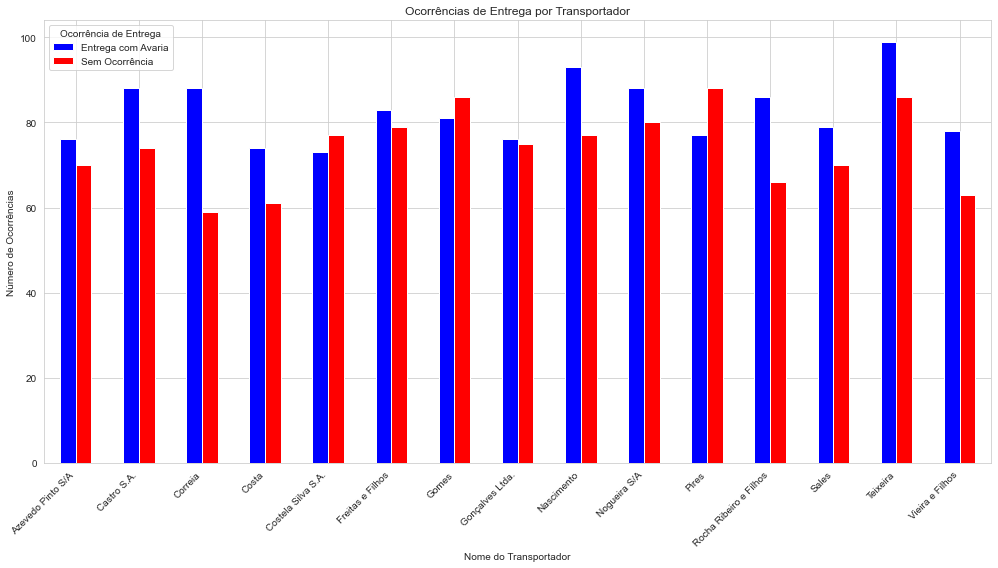

In [142]:
# Agrupar por 'Nome Transportador' e 'Ocorrência de Entrega' e contar o número de ocorrências
ocorrencias_por_fornecedor = otif.groupby(['Nome Transportador', 'Ocorrência de Entrega']).size().unstack(fill_value=0)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
ocorrencias_por_fornecedor.plot(kind='bar', stacked=False, figsize=(14, 8), color=['blue', 'red'])

plt.title('Ocorrências de Entrega por Transportador')
plt.xlabel('Nome do Transportador')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ocorrência de Entrega')
plt.tight_layout()
plt.show()

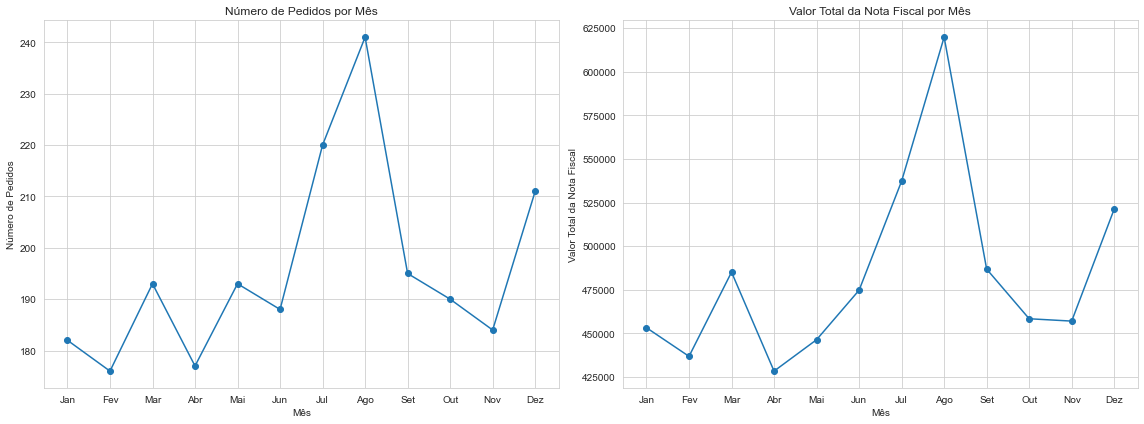

In [145]:
# Pedidos por mês

# Extrair o mês da coluna 'Data Expedição'
otif['Mês'] = otif['Data Expedição'].dt.month

# Contar o número de pedidos por mês
pedidos_por_mes = otif.groupby('Mês').size()

# Calcular o valor total da nota fiscal por mês
valor_nota_por_mes = otif.groupby('Mês')['Valor Nota Fiscal'].sum()

# Criar a figura e os subplots
plt.figure(figsize=(16, 6))

# Gráfico de pedidos por mês
plt.subplot(1, 2, 1)
plt.plot(pedidos_por_mes.index, pedidos_por_mes.values, marker='o', linestyle='-')
plt.title('Número de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)

# Gráfico de valor da nota fiscal por mês
plt.subplot(1, 2, 2)
plt.plot(valor_nota_por_mes.index, valor_nota_por_mes.values, marker='o', linestyle='-')
plt.title('Valor Total da Nota Fiscal por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total da Nota Fiscal')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)

plt.tight_layout()
plt.show()